In [1]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   tensorflow import keras
from   math import sqrt
from keras.models import load_model

In [2]:
#Big Data Import
db=pd.read_excel('db.xlsx')

#Data Extraction
y1 = db ["As_opt"]
y2 = db ["d_opt"]
y3 = db ["As_opt_p"]
x  = db [["fc","fy","Mu","b"]]

#Split Training Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2,ytrain3,ytest3 = train_test_split(x,y1,y2,y3,test_size=0.2,random_state=1) 

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [3]:
aprendizajes = 10
#ANN Asopt model def
mdl_Asopt=tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_Asopt.compile(optimizer='adam',loss=rmse)

#ANN dopt model def
mdl_dopt = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_dopt.compile(optimizer='adam',loss = rmse)

#ANN dopt model def
mdl_Asopt_p = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_Asopt_p.compile(optimizer='adam',loss = rmse)

c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Load parameters only
#mdl_Asopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt.keras.weights.h5')
#mdl_dopt.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_dopt.keras.weights.h5')
#mdl_Asopt_p.load_weights(r'D:\ToolBox\py\proyect_1\RedesNeuronales\prm_Asopt_p.keras.weights.h5')
mdl_Asopt = load_model(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_Asopt.keras')
mdl_dopt = load_model(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_dopt.keras')
mdl_Asopt_p = load_model(r'D:\ToolBox\py\proyect_1\RedesNeuronales\mdl_Asopt_p.keras')

c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\473037447.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

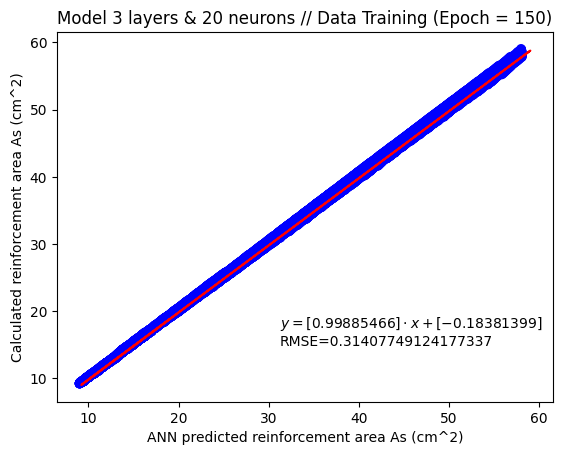

In [5]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Plotting
ypred1=mdl_Asopt.predict(xtrain)

RMSE=sqrt(mean_squared_error(ytrain1,ypred1))

# Coefficients
m, b = np.polyfit(ytrain1, ypred1, 1)

#Plotting scatter points and 1st-degree polynom
plt.scatter(ypred1,ytrain1,facecolors = 'none',edgecolors='b')
plt.plot(ytrain1, m*ytrain1 + b, color='red')

# Information Plot
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

 65/657 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\3199715387.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

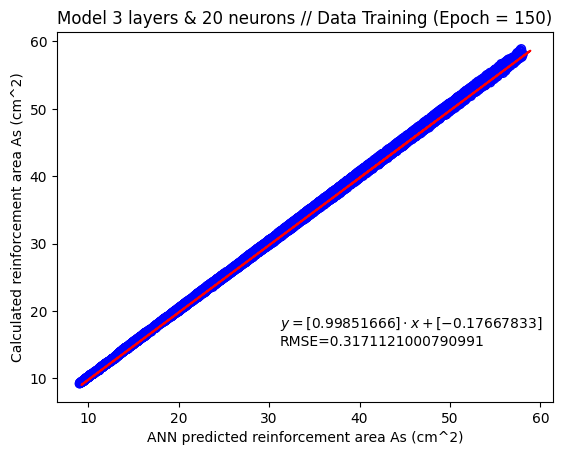

In [6]:
# TESTING PREDICTED VALUES VS TESTING VALUES
#Ploteando los Resultados
ypred1=mdl_Asopt.predict(xtest)
RMSE=sqrt(mean_squared_error(ytest1,ypred1))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest1, ypred1, 1)

plt.scatter(ypred1,ytest1,facecolors = 'none',edgecolors='b')
plt.plot(ytest1, m*ytest1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\4064728265.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


2625/2625 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step  


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

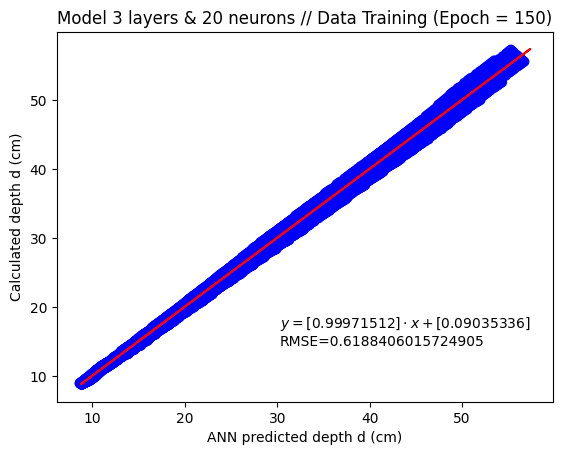

In [7]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred2 = mdl_dopt.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain2,ypred2))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain2, ypred2, 1)

plt.scatter(ypred2,ytrain2,facecolors = 'none',edgecolors='b')
plt.plot(ytrain2, m*ytrain2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')	

115/657 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\1821381068.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

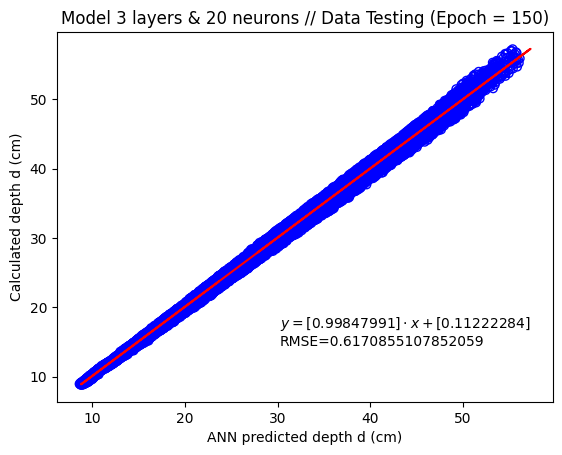

In [8]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred = mdl_dopt.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest2,ypred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest2, ypred, 1)

plt.scatter(ypred,ytest2,facecolors = 'none',edgecolors='b')
plt.plot(ytest2, m*ytest2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

  37/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step   

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\3129694629.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


2625/2625 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

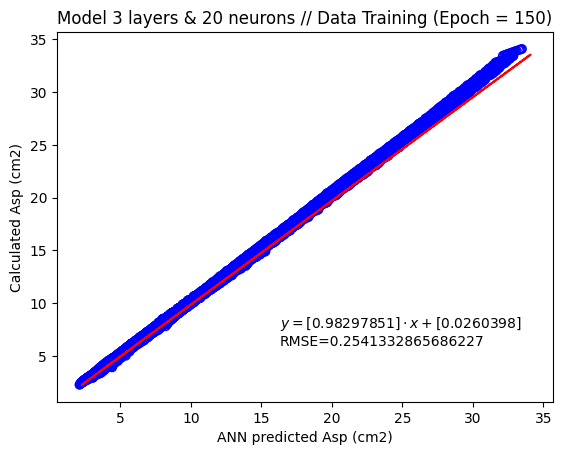

In [9]:
# COMPARING PREDICTED VALUES VS THEORETICAL VALUES
#Ploteando resultados
ypred3 = mdl_Asopt_p.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain3, ypred3, 1)

plt.scatter(ypred3,ytrain3,facecolors = 'none',edgecolors='b')
plt.plot(ytrain3, m*ytrain3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

102/657 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
C:\Users\JORGE\AppData\Local\Temp\ipykernel_18712\1769530696.py:13: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)


657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

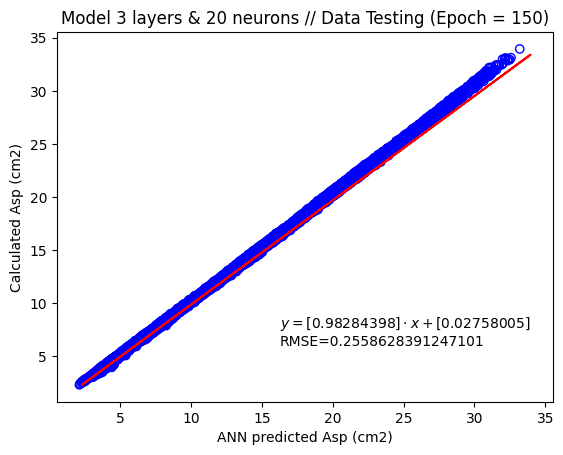

In [10]:
# TESTING PREDICTED VALUES VS TESTING VALUES
ypred3 = mdl_Asopt_p.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest3,ypred3))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest3, ypred3, 1)

plt.scatter(ypred3,ytest3,facecolors = 'none',edgecolors='b')
plt.plot(ytest3, m*ytest3 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted Asp (cm2)')
plt.ylabel('Calculated Asp (cm2)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')